In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import matplotlib.cm as cm
from scipy.misc import imresize
import cv2
import pandas as pd
import scipy.io as io

In [3]:
def data_extraction(path):
    data_l, data_r, data_all = [], [], []
    nor_data = io.loadmat(path)
    temp = nor_data['data']
    r = temp['right']
    l = temp['left']
    r_temp = r[0,0]
    l_temp = l[0,0]
    data_r.append(r_temp['image'][0][0])
    data_r.append(r_temp['gaze'][0][0])
    data_r.append(r_temp['pose'][0][0])
    data_l.append(l_temp['image'][0][0])
    data_l.append(l_temp['gaze'][0][0])
    data_l.append(l_temp['pose'][0][0])
    for i in range(3):
        data_all.append(data_r[i])
        data_all.append(data_l[i])
    return data_all

In [6]:
data_test = data_extraction('/home/spow12/Codes/Data/MPIIGaze/Data/Normalized/p00/day01.mat')

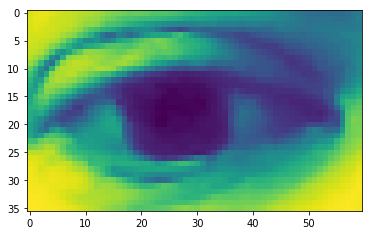

In [7]:
plt.imshow(data_test[0][1])

In [8]:
data_test[0][1].shape

(36, 60)

In [20]:
data_test[5][4].shape

(3,)